In [ ]:
!git clone https://github.com/qw2243c/Image-Recognition-Dogs-Fried-Chicken-or-Blueberry-Muffins-.git

Cloning into 'Image-Recognition-Dogs-Fried-Chicken-or-Blueberry-Muffins-'...
remote: Enumerating objects: 8073, done.
remote: Total 8073 (delta 0), reused 0 (delta 0), pack-reused 8073
Receiving objects: 100% (8073/8073), 399.80 MiB | 17.56 MiB/s, done.
Resolving deltas: 100% (3236/3236), done.
Updating files: 100% (9069/9069), done.


In [ ]:
import os

path = '/content/Image-Recognition-Dogs-Fried-Chicken-or-Blueberry-Muffins-/data/train/images'
image_files = os.listdir(path)[:5]
image_list = []

for image_file in image_files:
    image_path = os.path.join(path, image_file)
    image_list.append(image_path)


Датасет содержит изображения, расположенные в папке "/content/Image-Recognition-Dogs-Fried-Chicken-or-Blueberry-Muffins-/data/train/images". Кроме того, в той же директории находится файл "label_train.csv", который содержит метки (labels) для каждого изображения в датасете.

Содержимое файла "label_train.csv" представлено следующим образом:



```
0    img_0001    1
1    img_0002    1
2    img_0003    1
3    img_0004    1
4    img_0005    1
5    img_0006    1
6    img_0007    1
7    img_0008    1
8    img_0009    1
9    img_0010    1
```


Каждая строка в файле состоит из трех значений, разделенных табуляцией:

Индекс изображения (0, 1, 2, ..., 9).
Имя файла изображения (например, "img_0001").
Метка, указывающая на класс изображения (1).
Постановка задачи, основываясь на предоставленных данных, не ясна. Дополнительная информация о том, какую задачу необходимо решить или какие результаты требуются, будет полезной для более подробного описания.

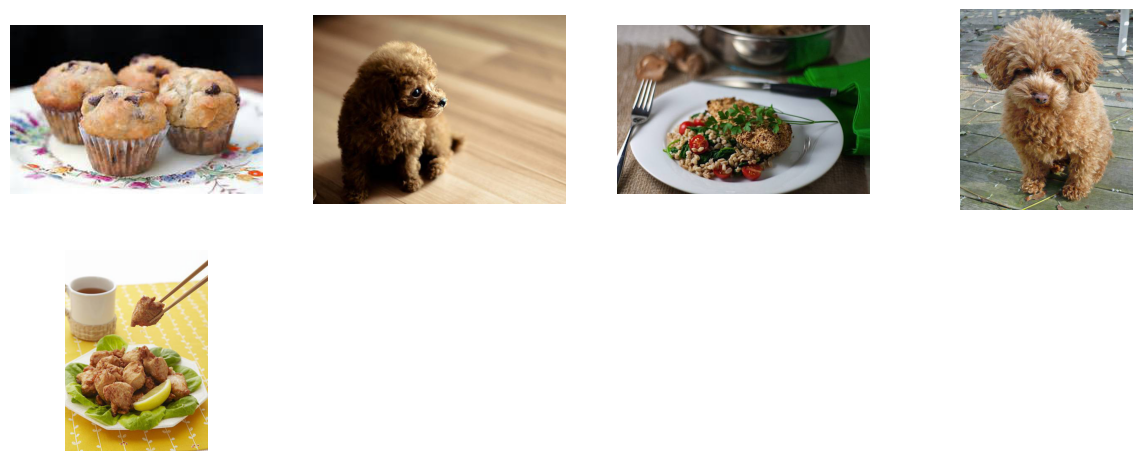

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
i = 0
for folder in image_list:
    image = Image.open(folder)
    ax = plt.subplot(4, 4, i + 1)
    plt.axis("off")
    plt.imshow(image)
    i += 1
    

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
from torchvision import transforms
import os

class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file, header=None, skiprows=1)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 1] + '.jpg'
        img_path = os.path.join(self.root_dir, img_name).replace('img_', '')
        image = Image.open(img_path)
        label = self.data.iloc[idx, 2]
        
        if self.transform:
            image = self.transform(image)

        return image, label

image_dir = '/content/Image-Recognition-Dogs-Fried-Chicken-or-Blueberry-Muffins-/data/train/images'
label_file = '/content/Image-Recognition-Dogs-Fried-Chicken-or-Blueberry-Muffins-/data/train/label_train.csv'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = CustomDataset(label_file, image_dir, transform=transform)

batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

import torch.nn as nn
import torch.optim as optim

class MyNet(nn.Module):
    def __init__(self, num_classes):
        super(MyNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),  # Добавление Dropout слоя для регуляризации
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),  # Добавление BatchNormalization слоя
        )

        self.classifier = nn.Linear(32 * 56 * 56, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x






In [37]:
learning_rate = 0.001
num_epochs = 10
num_classes = 3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MyNet(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

correct = 0.0
total = 0.0

for epoch in range(num_epochs):
    for images, labels in dataloader:
        images = images.to(device)
        labels = tuple(map(int, labels))
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels - 1)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {100 * correct/total:.2f}%')

Epoch [1/10], Loss: 0.2493, Accuracy: 15.32%
Epoch [2/10], Loss: 0.2244, Accuracy: 20.45%
Epoch [3/10], Loss: 0.0436, Accuracy: 25.41%
Epoch [4/10], Loss: 0.0723, Accuracy: 35.01%
Epoch [5/10], Loss: 0.0576, Accuracy: 37.92%
Epoch [6/10], Loss: 0.0182, Accuracy: 43.47%
Epoch [7/10], Loss: 0.1323, Accuracy: 56.01%
Epoch [8/10], Loss: 0.0072, Accuracy: 69.12%
Epoch [9/10], Loss: 0.0171, Accuracy: 78.21%
Epoch [10/10], Loss: 0.0163, Accuracy: 80.32%


In [38]:
import torchvision.models as models

pretrained_model = models.resnet152(pretrained=True)
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)
pretrained_model = pretrained_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pretrained_model.parameters(), lr=learning_rate)

correct = 0.0
total = 0.0

for epoch in range(num_epochs):
    for images, labels in dataloader:
        images = images.to(device)
        labels = tuple(map(int, labels))
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        outputs = pretrained_model(images)
        loss = criterion(outputs, labels-1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Эпоха [{epoch + 1}/{num_epochs}],  Потеря: {loss.item():.4f}, Accuracy: {100 * correct/total:.2f}%")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Эпоха [1/10], Потеря: 2.4226, Accuracy: 14.38%
Эпоха [2/10], Потеря: 0.1927, Accuracy: 76.26%
Эпоха [3/10], Потеря: 0.0433, Accuracy: 86.56%
Эпоха [4/10], Потеря: 0.0199, Accuracy: 90.41%
Эпоха [5/10], Потеря: 0.0151, Accuracy: 92.50%
Эпоха [6/10], Потеря: 0.0131, Accuracy: 93.74%
Эпоха [7/10], Потеря: 0.0018, Accuracy: 94.49%
Эпоха [8/10], Потеря: 0.0146, Accuracy: 95.21%
Эпоха [9/10], Потеря: 0.0004, Accuracy: 95.86%
Эпоха [10/10], Потеря: 0.0001, Accuracy: 96.45%


In [39]:
model.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        labels = tuple(map(int, labels))
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels-1)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Loss: {test_loss / len(dataloader):.4f} | Test Accuracy: {100 * correct/total:.2f}%')

Test Loss: 0.9072 | Test Accuracy: 75.43%


In [40]:
pretrained_model.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        labels = tuple(map(int, labels))
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        
        outputs = pretrained_model(images)
        loss = criterion(outputs, labels-1)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Loss: {test_loss / len(dataloader):.4f} | Test Accuracy: {100 * correct/total:.2f}%')

Test Loss: 0.0273 | Test Accuracy: 92.67%
